# Exploratory data analysis (EDA)

Exploratory data analysis (EDA)

## Imports

- Imports
  - `import seaborn as sns` results in an error: `no module name seaborn`
    - Resolve by installing the seaborn package via pip: `python3 -m pip install -U seaborn`
    - If you must upgrade pip: `pip install --upgrade pip`

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

## Load the data

- Load the data
  - Pandas `read_excel` may result in error: `Missing optional dependency 'openpyxl'`
    - Resolve by installing `openpyxl` with: `python3 -m pip install -U openpyxl`

In [26]:
FILE_NAME = 'snail_size.xlsx'
snails = pd.read_excel(FILE_NAME, index_col=None)
snails.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4177 non-null   object 
 1   length           4163 non-null   float64
 2   diameter         4163 non-null   float64
 3   height           4177 non-null   float64
 4   full_weight      4177 non-null   float64
 5   no_shell_weight  4177 non-null   float64
 6   core_weight      4177 non-null   float64
 7   shell_weight     4147 non-null   float64
 8   age              4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Look at Sample Data

In [ ]:
snails.head()

,gender,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,NaN,10
4,Infant,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Descriptive Analytics

In [ ]:
snails.describe()

,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age
count,4163.000000,4163.000000,4177.000000,4177.000000,4177.000000,4177.000000,4147.000000,4177.000000
mean,0.524042,0.407871,0.219368,0.828742,0.359367,0.180594,0.239078,9.933684
std,0.120100,0.099266,3.506068,0.490389,0.221963,0.109614,0.139089,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329750,11.000000
max,0.815000,0.650000,165.000000,2.825500,1.488000,0.760000,1.005000,29.000000


## Visualizations

array([[<Axes: title={'center': 'length'}>,
        <Axes: title={'center': 'diameter'}>,
        <Axes: title={'center': 'height'}>],
       [<Axes: title={'center': 'full_weight'}>,
        <Axes: title={'center': 'no_shell_weight'}>,
        <Axes: title={'center': 'core_weight'}>],
       [<Axes: title={'center': 'shell_weight'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

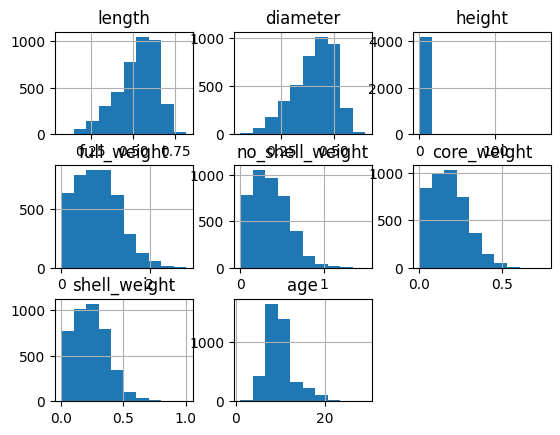

In [ ]:
snails.hist()

## Missing data

In [ ]:
snails.loc[snails['height']==0.0]

,gender,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age
1257,Infant,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8
3996,Infant,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6


In [ ]:
# np.where(snails.applymap(lambda x: x == ''))
missing_cols, missing_rows = (
    (snails.isnull().sum(x) | snails.eq('').sum(x))
    .loc[lambda x: x.gt(0)].index
    for x in (0, 1)
)
snails.loc[missing_rows, missing_cols]

,length,diameter,shell_weight
3,0.440,0.365,NaN
42,0.240,0.175,NaN
81,0.620,0.510,NaN
120,0.470,0.365,NaN
159,0.575,0.460,NaN
198,0.560,0.450,NaN
237,0.130,0.100,NaN
276,0.660,0.530,NaN
315,0.450,0.355,NaN
354,0.635,0.515,NaN


## Typo check

In [18]:
snails['gender'].value_counts()

gender
M          1528
Infant     1335
F          1307
Instant       7
Name: count, dtype: int64

## Descriptive statistics

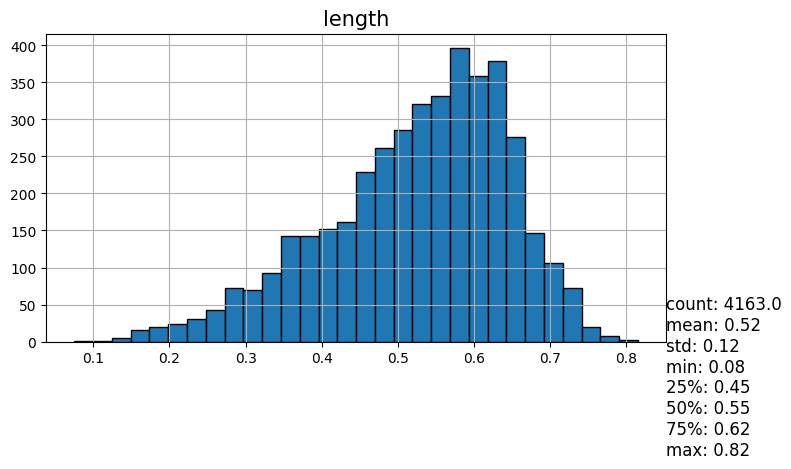

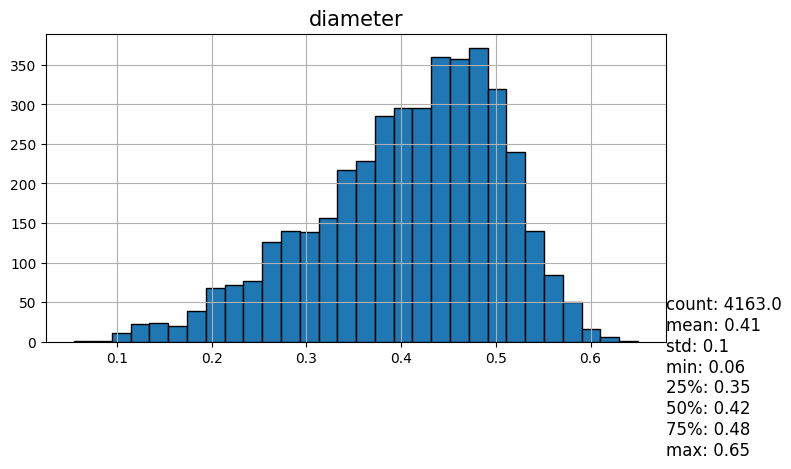

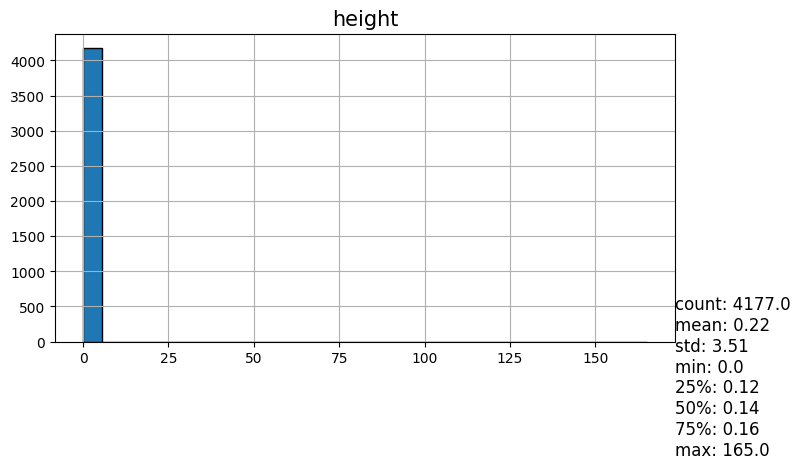

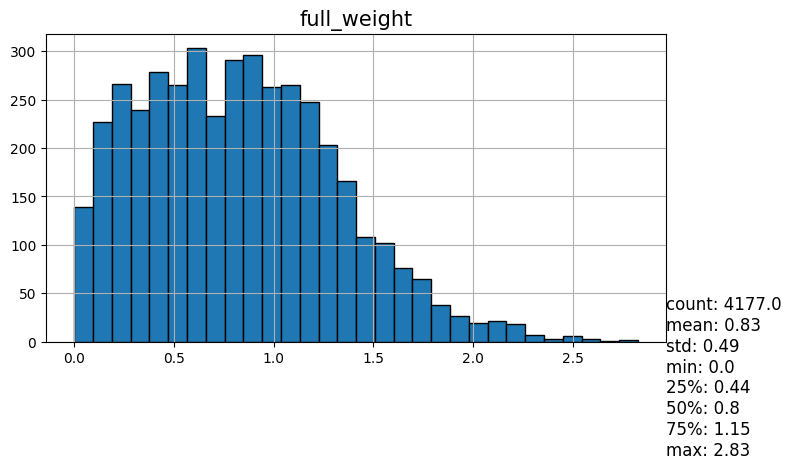

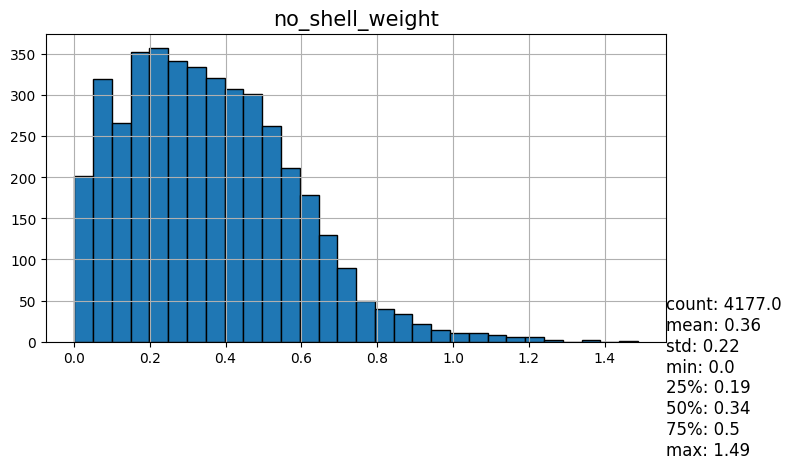

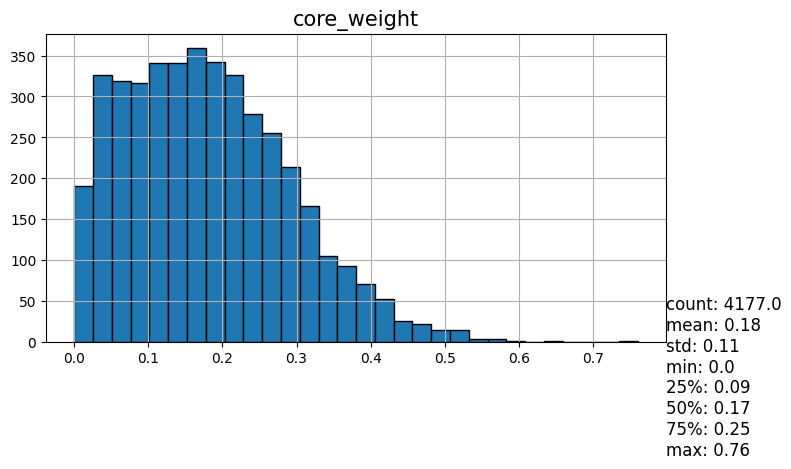

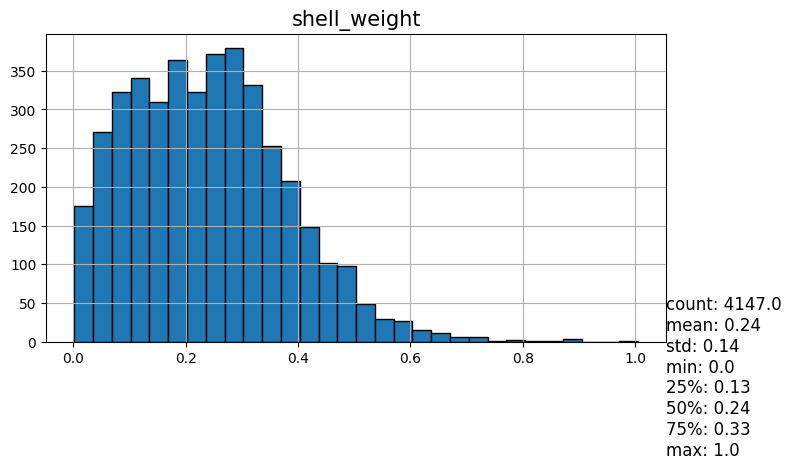

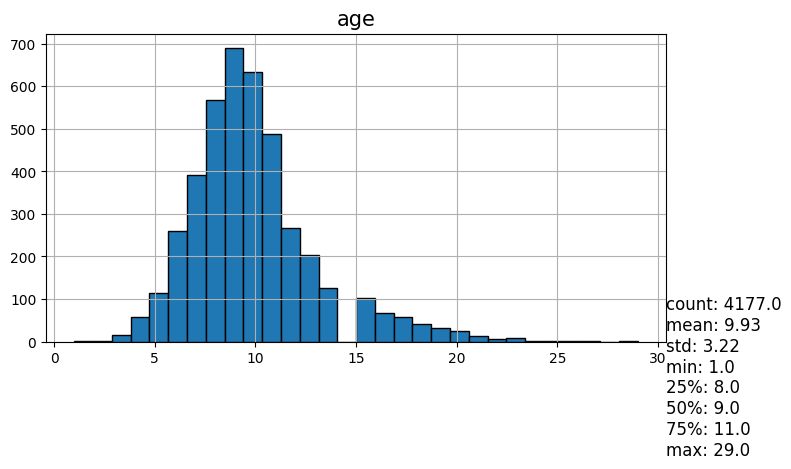

In [27]:
def desc_num_feature(feature_name, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    # Filter out blank values
    non_blank_values = snails[feature_name][snails[feature_name].notnull()]
    
    non_blank_values.hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    
    # Display descriptive statistics
    stats = non_blank_values.describe().round(2)
    stats_text = '\n'.join(f"{stat}: {value}" for stat, value in stats.items())
    ax.text(1, 0.15, stats_text, transform=ax.transAxes, fontsize=12, va='top')
    plt.show()

# TODO: Can I assign this by variable type?
numerical_features=['length', 'diameter', 'height', 'full_weight', 'no_shell_weight', 'core_weight', 'shell_weight', 'age']

for x in numerical_features:
    desc_num_feature(x)

# Code snippet modified from Fuentes (2018)

## Data correlations

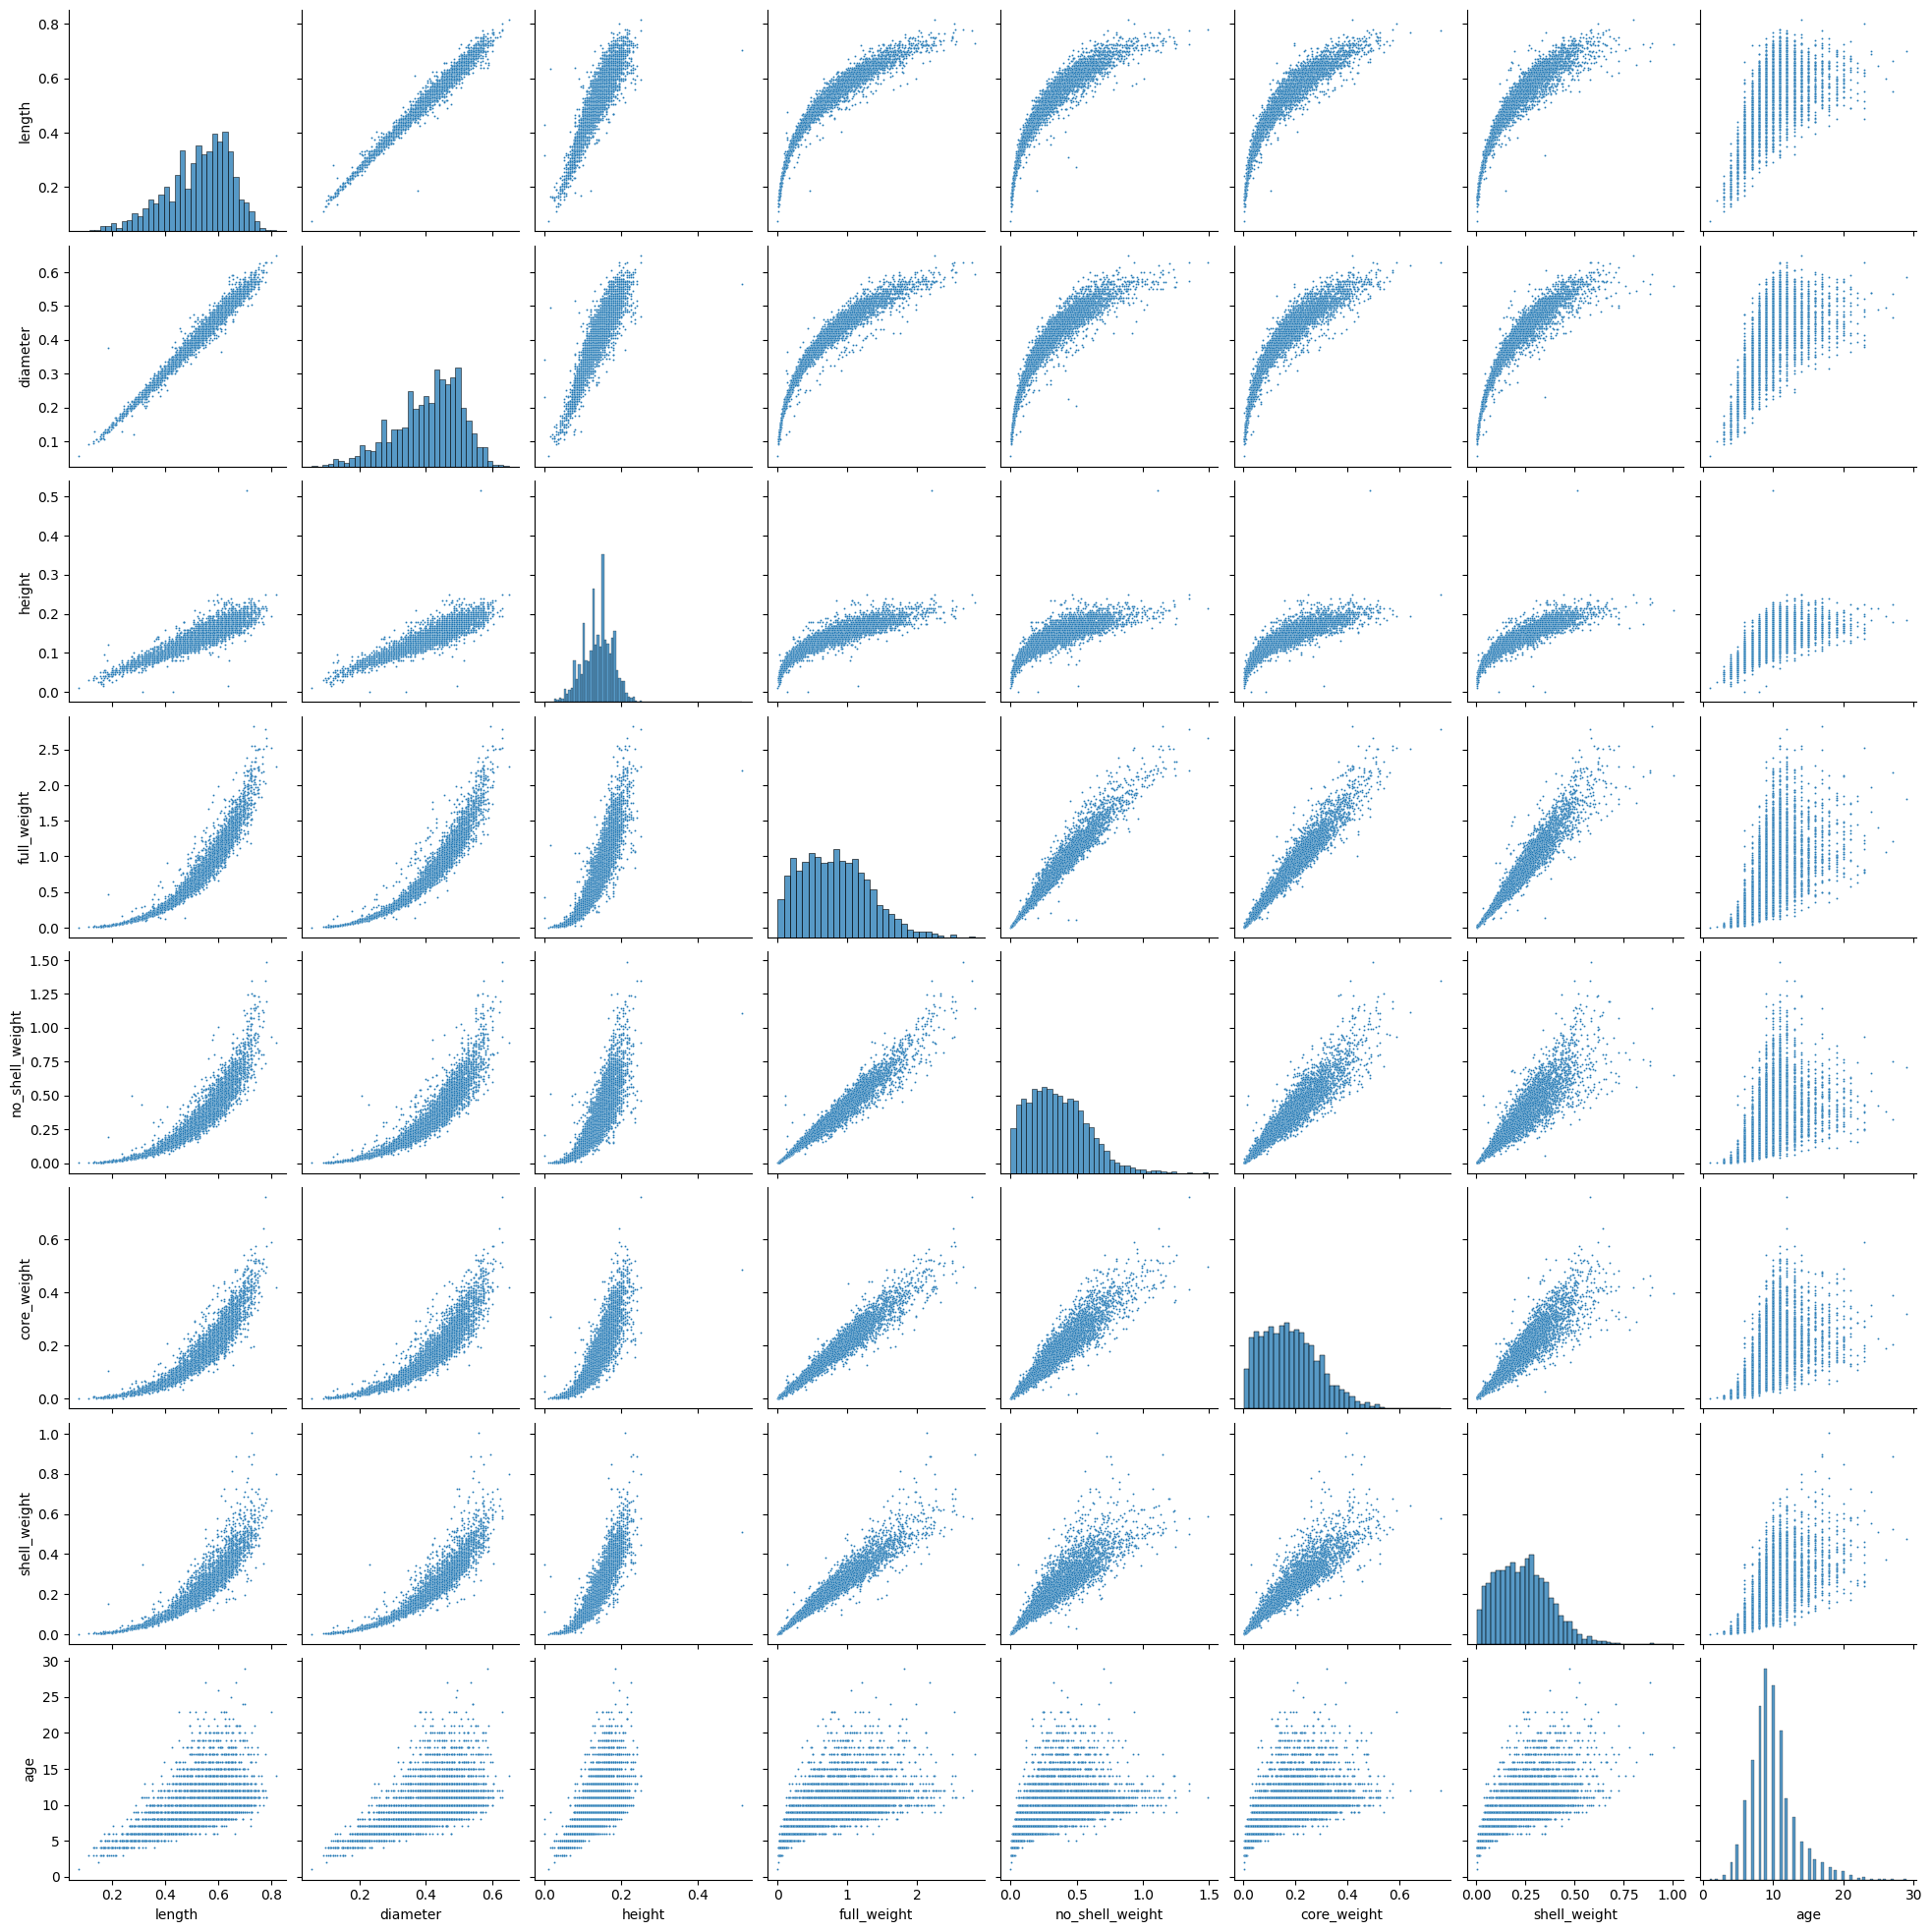

In [35]:
sns.pairplot(snails[snails['height'] < 1.0][numerical_features], plot_kws={"s": 2})

In [36]:
snails[numerical_features].corr()

,length,diameter,height,full_weight,no_shell_weight,core_weight,shell_weight,age
length,1.000000,0.986836,0.031092,0.925109,0.897713,0.902941,0.898193,0.556459
diameter,0.986836,1.000000,0.023029,0.925500,0.893227,0.899629,0.905727,0.574515
height,0.031092,0.023029,1.000000,0.021602,0.019173,0.026642,0.022889,0.008717
full_weight,0.925109,0.925500,0.021602,1.000000,0.969405,0.966375,0.955526,0.540390
no_shell_weight,0.897713,0.893227,0.019173,0.969405,1.000000,0.931961,0.883249,0.420884
core_weight,0.902941,0.899629,0.026642,0.966375,0.931961,1.000000,0.908726,0.503819
shell_weight,0.898193,0.905727,0.022889,0.955526,0.883249,0.908726,1.000000,0.627703
age,0.556459,0.574515,0.008717,0.540390,0.420884,0.503819,0.627703,1.000000


### Questions about the `snail_size.xlsx`

- Questions about the `snail_size.xlsx`
  - What types of variables are there in the dataset?
    - All values in the dataset are numerical except the `gender` column which is categorical. All of the numerical columns are float except `age` which is an integer
  - What do their distributions look like?
    - The distributions can be seen under the `Visualizations` header. There seems to be an issue with the height data. Most of the data appears to be skewed right, some are skewed left. Fuentes (2018), describes some of the most common distribution shapes when producing histograms as: symmetric, skewed right, skewed left, bimodal, multimodal, and symmetric, unimodal.
  - Do you have missing values (do not fix this)?
    - As seen under the `Missing data` section, there are missing values in `length`, `diameter`, and `shell_weight`.
  - Are there any typos (not just misspellings but other things that just don't seem right)?
    - As seen in the `Typo check` section, there are 7 typos in the `gender` column
  - Is there any formatting that causes Python to think a number is a string?
    - There does not appear to be any
  - Do you observe outliers?
    - Under the `Descriptive statistics` it is clear to see `height` has at least outlier. This can be also seen in the `Descriptive Analytics` and `Visualizations` sections
  - Are the outliers really outliers, or maybe typos?
    - The outliers could appears to be a missing a decimal place
  - How do the different pairs of features correlate with one other?
    - There are strong correlations between length, diameter, full_weight, no_shell_weight, core_weight, and shell_weight. Age has light correlcation with these columns. The scatter plot shows there are correlations between height and all items except age, but the Pearson's correlation coefficient reports that there isn't much correlation.
  - Do these correlations make sense?
    - Yes the correlcations make sense in relationship to the mass of the snail
  - What is the relationship between the features and the target?
    - The bigger the mass the bigger the snail
  - Do any features exhibit skew?
    - `full_weight`, `no_shell_weight`, `core_weight`, and `shell_weight` appear to be skewed right
  - What do you know now that will inform the modeling strategy?
    - `length` and `diameter` seem to be the most strongly correllated in the snail data

References

Fuentes, A. (2018). *Hands-on predictive analytics with Python: Master the complete predictive analytics process, from problem definition to model deployment* Packt Publishing.